<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Define-X,-y" data-toc-modified-id="Define-X,-y-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define X, y</a></span></li><li><span><a href="#Establish-a-KNN-model" data-toc-modified-id="Establish-a-KNN-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Establish a KNN model</a></span></li><li><span><a href="#Make-predictions-and-calculate-accuracy" data-toc-modified-id="Make-predictions-and-calculate-accuracy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Make predictions and calculate accuracy</a></span></li><li><span><a href="#Apply-PCA" data-toc-modified-id="Apply-PCA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Apply PCA</a></span><ul class="toc-item"><li><span><a href="#scale-the-data" data-toc-modified-id="scale-the-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>scale the data</a></span></li><li><span><a href="#pca-analysis" data-toc-modified-id="pca-analysis-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>pca analysis</a></span></li><li><span><a href="#calculate-the-explained-variance-ratio-of-each-component" data-toc-modified-id="calculate-the-explained-variance-ratio-of-each-component-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>calculate the explained variance ratio of each component</a></span></li><li><span><a href="#visualize-the-pca-result" data-toc-modified-id="visualize-the-pca-result-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>visualize the pca result</a></span></li><li><span><a href="#Apply-PCA-to-KNN" data-toc-modified-id="Apply-PCA-to-KNN-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Apply PCA to KNN</a></span></li></ul></li></ul></div>

# PCA

## Load the data

In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Define X, y

In [2]:
X = data.drop(['target','label'], axis=1)
y = data.label
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Establish a KNN model 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)
y_predicted = KNN.predict(X)

## Make predictions and calculate accuracy

In [6]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predicted)
accuracy

0.96

## Apply PCA

### scale the data

In [11]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [13]:
#validate the mean and sigma
x1_mean = X['sepal length'].mean()
x1_norm_mean = X_norm[:,0].mean()
x1_sigma = X['sepal length'].std()
x1_norm_sigma = X_norm[:,0].std()
print(x1_mean,x1_sigma,x1_norm_mean,x1_norm_sigma)

5.843333333333335 0.8280661279778629 -4.736951571734001e-16 1.0


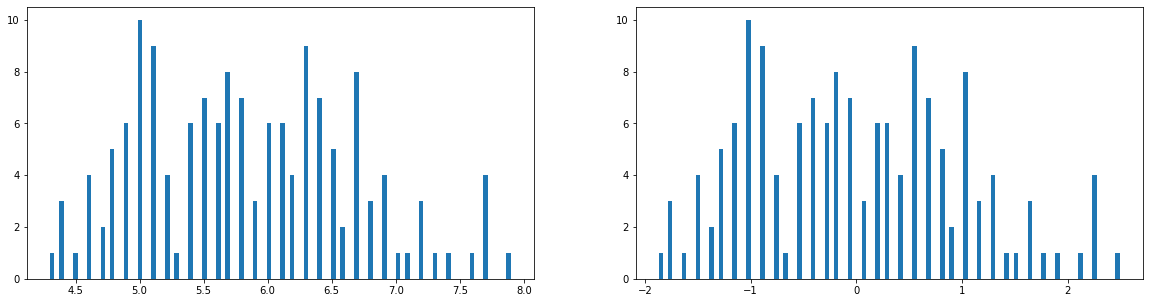

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize =(20,5))
plt.subplot(121)
plt.hist(X['sepal length'], bins=100)

plt.subplot(122)
plt.hist(X_norm[:,0], bins=100)
plt.show()

### pca analysis

In [15]:
X.shape

(150, 4)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_norm) # make sure the input is x_norm

### calculate the explained variance ratio of each component

In [17]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

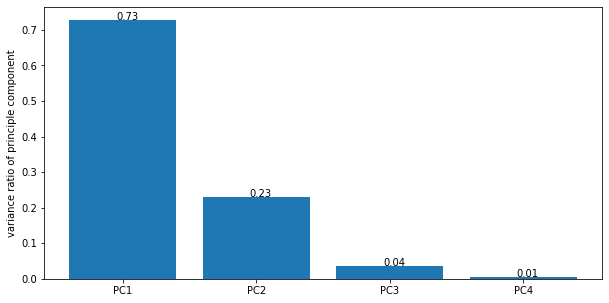

In [37]:
fig2 = plt.figure(figsize=(10,5))
plt.bar([1,2,3,4], var_ratio)
plt.xticks(([1,2,3,4]),(['PC1','PC2','PC3','PC4']))
plt.ylabel('variance ratio of principle component')

for a,b in zip([1,2,3,4],var_ratio):
    plt.text(a-.05,b,f'{b:.2f}')
    
plt.show()


In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(150, 2)

In [12]:
type(X_pca)

numpy.ndarray

### visualize the pca result

In [51]:
data.groupby(['target','label']).count()

,,sepal length,sepal width,petal length,petal width
target,label,,,,
Iris-setosa,0,50,50,50,50
Iris-versicolor,1,50,50,50,50
Iris-virginica,2,50,50,50,50


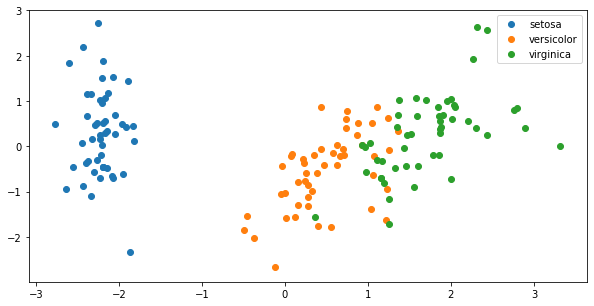

In [49]:
fig3= plt.figure(figsize=(10,5))
setosa = plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0])
versicolor = plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1])
virginica = plt.scatter(X_pca[:,0][y==2],X_pca[:,1][y==2])
plt.legend((setosa, versicolor, virginica),('setosa', 'versicolor', 'virginica'))
plt.show()

### Apply PCA to KNN 

In [52]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca,y)
y_predicted= KNN.predict(X_pca)
accuracy=accuracy_score(y,y_predicted)
accuracy

0.9466666666666667